In [1]:
import copy
import random

from nbmetalog import nbmetalog as nbm
import pandas as pd
import seaborn as sns

import pylib

random.seed(1)


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az520-878
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: 00-naive-surface
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/00-naive-surface.ipynb
revision: null
session: 5d7f0e90-1f62-4738-a91b-013eb997fb84
timestamp: 2024-01-04T23:43:16Z00:00


IPython==7.31.1
keyname==0.5.2
yaml==6.0
nbmetalog==0.2.6
pandas==1.5.2
seaborn==0.12.1
re==2.2.1
comm==0.1.3
logging==0.5.1.2
psutil==5.9.5
zmq==25.1.0
json==2.0.9
ipykernel==6.23.3


In [3]:
def get_deposition_site_at_rank(rank: int) -> int:
    return pylib.hanoi.get_hanoi_value_at_index(rank)


In [4]:
def get_deposition_rank_at_site(site: int, num_site_depositions: int) -> int:
    if num_site_depositions == 0:
        return 0

    num_incidences = pylib.hanoi.get_incidence_count_of_hanoi_value_through_index(
        site,
        num_site_depositions - 1,
    )
    if num_incidences == 0:
        return 0

    return pylib.hanoi.get_index_of_hanoi_value_nth_incidence(site, num_incidences - 1)


In [5]:
surface_size = 64
num_generations = 1000

surface_timestamps = [0] * surface_size
surface_values = [random.choice([0, 1]) for __ in range(surface_size)]


In [6]:
surface_timestamps_records = []
for generation in range(num_generations):
    target_site = get_deposition_site_at_rank(generation)
    surface_values[target_site] = random.choice([0, 1])
    surface_timestamps[target_site] = generation

    assert [
        get_deposition_rank_at_site(site, generation + 1)
        for site in range(surface_size)
    ] == surface_timestamps

    for site, timestamp in enumerate(surface_timestamps):
        surface_timestamps_records.append(
            {
                "generation": generation,
                "site": site,
                "timestamp": timestamp,
            }
        )


In [7]:
surface_timestamps_df = pd.DataFrame.from_records(surface_timestamps_records)
surface_timestamps_df


,generation,site,timestamp
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
63995,999,59,0
63996,999,60,0
63997,999,61,0
63998,999,62,0


<AxesSubplot: xlabel='generation', ylabel='timestamp'>

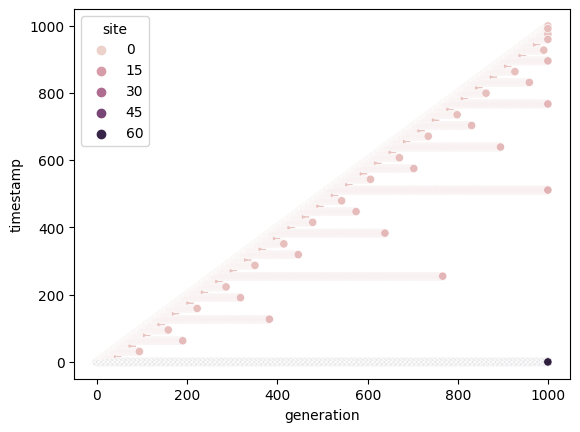

In [8]:
sns.scatterplot(
    data=surface_timestamps_df,
    x="generation",
    y="timestamp",
    hue="site",
)


<AxesSubplot: xlabel='generation', ylabel='site'>

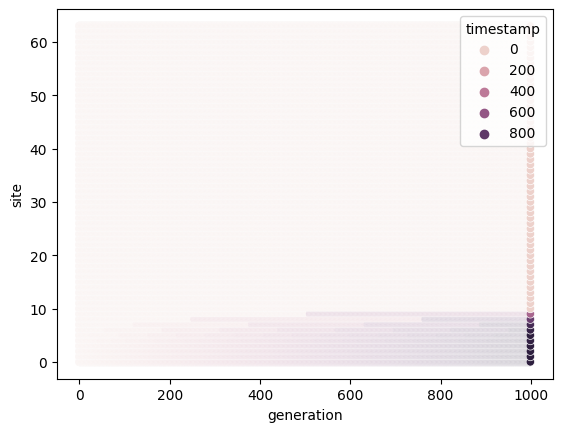

In [9]:
sns.scatterplot(
    data=surface_timestamps_df,
    x="generation",
    y="site",
    hue="timestamp",
)
